# Principal Component Analysis as an initial step to Mixture Modeling

My master's thesis will include a mixture model of commuting flows within the contiguous United States. Mixture models are probabilistic models that allow researchers to make inferences about the properties of subpopulations within an overall population by detecting similarities between subgroups within the dataset. This type of modeling is very useful for identifying key characteristics of your data, and is able to tease out obivous and underlying relationships between variables.

An interesting preliminary analysis that some data scientists investigate before implimenting a mixture model is Principal Component Analysis (PCA). This is a method of dimensionality reduction, a way to reduce the number of potential random variables by developing a set of principal variables. 

With this in mind, I compare two methods of coding PCA using a subset of the commuting data. One is a step-by-step approach, and the other uses the PCA function from the Python module matplotlib. The purpose of the comparison is simply to work through the mathematical steps involved with computing a PCA and compare it with a canned result to show the differences. This is built off an example in Sebastian Raschka's book, Machine Learning in Python https://sebastianraschka.com/books.html. 

First we read in the data from a csv file. This data was collected from the American Community Survey, https://www.census.gov/programs-surveys/acs/. 

In [82]:
import pandas as pd
NY = pd.read_csv("~/Desktop/NY.csv")
NY.head()

,Unnamed: 0,DGEOID,OGEOID,ny.commuters.OSName,ny.commuters.OCName,ny.commuters.DSName,ny.commuters.DCName,ny.commuters.Commuters,ny.commuters.MOE,DPop,OPop,DIST
0,1,1035,36047,New York,Kings County,Alabama,Conecuh County,13,22,13228,2504700,15.964518
1,2,1049,36029,New York,Erie County,Alabama,DeKalb County,20,30,71109,919040,10.872343
2,3,1073,36047,New York,Kings County,Alabama,Jefferson County,41,34,658466,2504700,14.755786
3,4,1073,36055,New York,Monroe County,Alabama,Jefferson County,17,26,658466,744344,13.420039
4,5,1073,36061,New York,New York County,Alabama,Jefferson County,28,32,658466,1585873,14.806362


In [84]:
NY.shape

(4382, 12)

The original data table has more information than we need, so we'll pare it down to just a few indicators; the response variable, 'Flow', and two of the input variables, the commuting distance (Dist) and the population of the origin county (OPop). I'm purposefully choosing only three variables because this will make visualization a bit easier. 

In [85]:
counts = NY[['Flows', 'Dist', 'OPop']]
counts.head()

,Flows,Dist,OPop
0,13,15.964518,2504700
1,20,10.872343,919040
2,41,14.755786,2504700
3,17,13.420039,744344
4,28,14.806362,1585873


In [126]:
counts.shape

(4382, 3)

The subsequent matrix code will rely on a row vector, so transpose the matrix. 

In [127]:
counts2 = pd.DataFrame.transpose(counts)
counts2.head()

,0,1,2,3,4,5,6,7,8,9,...,4372,4373,4374,4375,4376,4377,4378,4379,4380,4381
Flows,1.300000e+01,20.000000,4.100000e+01,17.000000,2.800000e+01,11.000000,9.00000,4.000000e+00,15.000000,7.000000,...,39.00000,1.100000e+01,2.000000,3.000000,9.000000,4.000000,9.000000,17.000000,1.700000e+01,10.000000
Dist,1.596452e+01,10.872343,1.475579e+01,13.420039,1.480636e+01,14.947576,12.90024,1.555509e+01,14.818637,14.977298,...,14.10671,1.494570e+01,11.049371,15.198075,12.532126,10.263516,13.481606,27.083539,3.581469e+01,28.925942
OPop,2.504700e+06,919040.000000,2.504700e+06,744344.000000,1.585873e+06,311687.000000,98990.00000,1.493350e+06,304204.000000,80317.000000,...,50219.00000,1.585873e+06,80317.000000,51599.000000,25348.000000,48946.000000,88830.000000,744344.000000,1.585873e+06,919040.000000


Calculate the empirical mean of each row vector. 

In [93]:
mean_x = np.mean(counts2.iloc[0,:])
mean_y = np.mean(counts2.iloc[1,:])
mean_z = np.mean(counts2.iloc[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[  2.01050411e+03]
 [  6.43082860e+00]
 [  5.72162875e+05]]


Now we'll create a scatter matrix of deviations from the mean by subtracting the empirical mean vector from each row in the data matrix. The deviations will be stored in a new matrix.

In [95]:
scatter_matrix = np.zeros((3,3))
for i in range(counts2.shape[1]):
    scatter_matrix += (counts2.iloc[:,i].reshape(3,1) - mean_vector).dot((counts2.iloc[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[  2.28543520e+12  -5.49635692e+07   5.51571417e+12]
 [ -5.49635692e+07   4.79100243e+05   5.79561667e+09]
 [  5.51571417e+12   5.79561667e+09   2.24796549e+15]]


Now we can calculate the empirical covariance matrix from the outer product of the scatter matrix with itself. 

In [96]:
cov_mat = np.cov([counts2.iloc[0,:], counts2.iloc[1,:], counts2.iloc[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[  5.21669756e+08  -1.25458957e+04   1.25900803e+09]
 [ -1.25458957e+04   1.09358649e+02   1.32289812e+06]
 [  1.25900803e+09   1.32289812e+06   5.13116981e+11]]


Now we'll calculate the eigenvalues and eigenvectors of both the scatter matrix and the covariance matrix. 

In [97]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

In [98]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

In [132]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all()

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(60 * '-')

Eigenvector 1: 
[[ -2.45612203e-03]
 [ -2.57807750e-06]
 [ -9.99996984e-01]]
Eigenvalue 1 from scatter matrix: 2247979040851715.5
Eigenvalue 1 from covariance matrix: 513120073237.0985
Scaling factor:  4381.0
------------------------------------------------------------
Eigenvector 2: 
[[  9.99996983e-01]
 [ -3.04584392e-05]
 [ -2.45612195e-03]]
Eigenvalue 2 from scatter matrix: 2271887894444.958
Eigenvalue 2 from covariance matrix: 518577469.6290688
Scaling factor:  4381.0
------------------------------------------------------------
Eigenvector 3: 
[[  3.04520152e-05]
 [  1.00000000e+00]
 [ -2.65287937e-06]]
Eigenvalue 3 from scatter matrix: 462051.4193797345
Eigenvalue 3 from covariance matrix: 105.4671123903178
Scaling factor:  4380.99999998
------------------------------------------------------------


Plotting the eigenvectors is sadly, unfruitful since there are so many data points...

Populating the interactive namespace from numpy and matplotlib


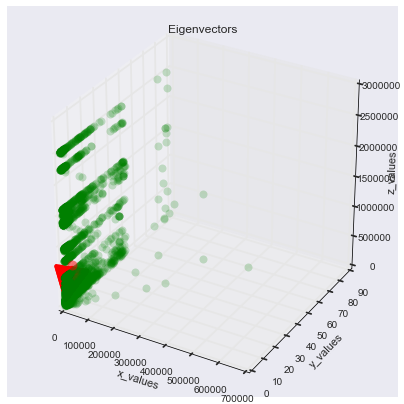

In [137]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(counts2.iloc[0,:], counts2.iloc[1,:], counts2.iloc[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=80, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

Moving forward, we want to sort the columns of the eigenvector and eigenvalue matrices in decreasing order, but maintain the correct pairings between columns of each matrix.  

In [106]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

Recall that the goal is to obtain a smaller set of variables, so now we want to decide which pairs of eigenvalues should be dropped in order to create that smaller set. Eigenvectors with the lowest eigenvalues will be dropped and eigenvectors with the highest eigenvalues will be used to construct a new eigenvector matrix. Notice that we've lost one dimension in doing this, we've gone from a 3 x 3 to a 3 x 2 eigenvector matrix. -So we've successfully decreased the number of potential variables. 

In [107]:
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

for i in eig_pairs:
    print(i[0])

2.24797904085e+15
2.27188789444e+12
462051.41938


In [108]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ -2.45612203e-03   9.99996983e-01]
 [ -2.57807750e-06  -3.04584392e-05]
 [ -9.99996984e-01  -2.45612195e-03]]


In [111]:
matrix_w.shape

(3, 2)

Now we transform the remaining data into a new subspace, and our principal component analysis is complete. 

In [120]:
transformed = matrix_w.T.dot(counts2)
assert transformed.shape == (2,4382)
transformed.shape

(2, 4382)

We can see that the new subspace has a reduced dimension, which is what we wanted. Now we'll try using the canned PCA function from matplotlib. But first, it would be helpful to have a visual for comparison, so we let's plot the transformed data. 

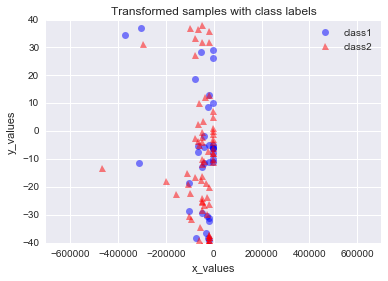

In [122]:
plt.plot(transformed[0,0:2164], transformed[1,0:2164], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,2164:4328], transformed[1,2164:4328], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-700000,700000])
plt.ylim([-40,40])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

Now implimenting the matplotlib function, and plotting it. 

In [123]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(counts2.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)


PC axes in terms of the measurement axes scaled by the standard deviations:
 [[-0.11075578 -0.68227557 -0.72265705]
 [-0.9132906   0.35664195 -0.19674046]
 [-0.39196103 -0.63820574  0.66261602]]


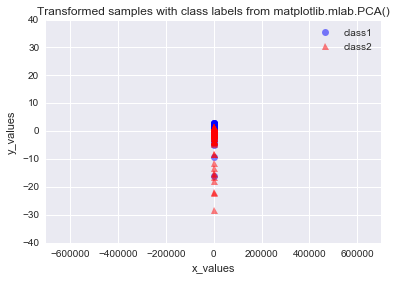

In [124]:
plt.plot(mlab_pca.Y[0:2164,0],mlab_pca.Y[0:2164,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[2164:4328,0], mlab_pca.Y[2164:4328,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-700000,700000])
plt.ylim([-40,40])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

Notice that this does not look like our step-by-step plot. The contribution of each variable to the principal component analysis is dependent on its variance. Matplotlib scales each variable so that it has a unit variance *before* determining the covariance matrix. So, the principal components in our step-by-step analysis are not the same as the principal components from the Matplotlib analysis. And in fact, the Matplotlib analysis may be more appropriate if we can't assume our variables have the same units. 

The Python module SciKit-Learn also has a canned function for producing a PCA. Out of curiosity, let's see how it compares to our other two PCA's. 

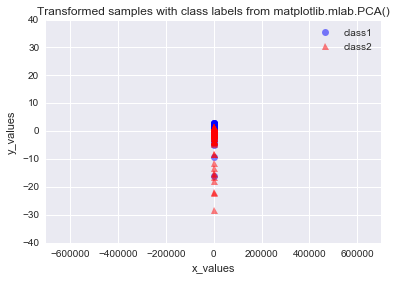

In [125]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(counts2.T)

plt.plot(mlab_pca.Y[0:2164,0],mlab_pca.Y[0:2164,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[2164:4328,0], mlab_pca.Y[2164:4328,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-700000,700000])
plt.ylim([-40,40])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

SciKit-Learn's PCA function produces a plot similar to that of MatPlotLib. However, if our components weren't centered at zero, we would see the the eigenvalues in this PCA function are allowed to be negative. -This is easily resolved by multiplying the matrices by -1.  

So, how exactly does this relate to mixture models? 

In a publication by Mike E. Tipping and Christopher M. Bishop, http://www.miketipping.com/papers/met-mppca.pdf PCA is calculated within a maximum-likelihood framework, resulting in a well-defined mixture model. Christopher Bishop continued this work, using it within a Bayesian framework, https://papers.nips.cc/paper/1549-bayesian-pca.pdf. This method has the benefit of determining the effective number of principal components by allowing an automated selection of model dimensionality. -This avoids the tedium of numerically analysizing the optimal number of dimensions. 

A Bayesian PCA can be obtained by assigning a prior distribution to the model parameters. To automatically determine an effective dimensionality for the latent space, Bishop suggests using a hierarchical prior on the covariance matrix that is dependent on a vector of hyper-parameters. Each hyper-parameter effects one column of the covariance matrix through a conditional Gaussian distribution. 

To actually use the model, we can use one of three methods:

1.) Find the type-II maximum likelihood using a local Gaussian approximation to a mode of the posterior distribution.

2.) Use a Markov Chain Monte Carlo Simulation using Gibbs sampling. Or,

3.) Use a variational inference by finding a factorized approximation to the posterior distribution. 

...That third one doesn't sound very fun. 

However, the first two can be done easily either in R or Python, so we're on our way to mixture models. 

The Bayesian version of PCAs are particularly useful for small data sets in high dimensions. This version avoids the singularities associated with maximum likelihood PCAs by suppressing unwanted degrees of freedom in the model. When constructing a mixture model, this is advantageous because the effective number of data points associated with specific 'clusters' can be small even when the total number of data points is large. -Which is how I might expect the commuting data to behave. 